In [8]:
!python mdp.py < ex.mdp

In [1]:
# pip install antlr4-python3-runtime
# conda install python-graphviz
%reload_ext autoreload
%autoreload 2
from graphe import *

In [2]:
lexer = gramLexer(FileStream("ex.mdp"))
stream = CommonTokenStream(lexer)
parser = gramParser(stream)
tree = parser.program()
printer = gramPrintListener()
walker = ParseTreeWalker()
walker.walk(printer, tree)

In [3]:
graph = graphe("ex.mdp")

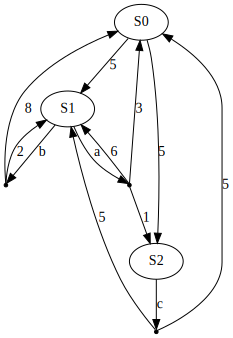

In [4]:
graph.visualizeGraphe()

In [5]:
test = "abc"

In [6]:
graph.statistiques()

Freq     ->S0    ->S1    ->S2   Total
S0     0.0000  0.1792  0.1764  0.3556
S1     0.2436  0.1748  0.0272  0.4456
S2     0.0972  0.1016  0.0000  0.1988
Total  0.3408  0.4556  0.2036  1.0000


In [9]:
graph.parcours(make_gif=True, regle="alea")

MoviePy - Building file parcours.gif with imageio.


In [19]:
import graphviz
dot = graphviz.Digraph('round-table', comment='The Round Table')

In [20]:
dot.node('A', 'King Arthur', shape='point')  
dot.node('B')
dot.node('L', 'Sir Lancelot the Brave')

dot.edges(['AB', 'AL'])
dot.edge('B', 'L', constraint='false', label='b_to_l')

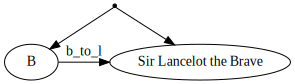

In [21]:
dot

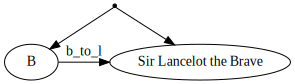

In [22]:
dot